## Program to implement simple perceptron using keras and pytorch

Data Set Information: Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
df=pd.read_csv("/content/Raisin_Dataset (1).csv")

In [ ]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=["Class"]))
y = df["Class"].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple perceptron model using Keras
model_keras = keras.Sequential([
    keras.layers.Dense(1, activation="sigmoid", input_shape=(X_train.shape[1],))
])

# Compile the model
model_keras.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model_keras.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict on test data
y_pred_keras = (model_keras.predict(X_test) > 0.5).astype(int)

# Compute confusion matrix
conf_matrix_keras = confusion_matrix(y_test, y_pred_keras)
accuracy_keras = accuracy_score(y_test, y_pred_keras)

print("Keras Confusion Matrix:\n", conf_matrix_keras)
print("Keras Accuracy:", accuracy_keras)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2979 - loss: 1.0574 - val_accuracy: 0.2111 - val_loss: 1.0512
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3443 - loss: 0.9604 - val_accuracy: 0.2389 - val_loss: 0.9505
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3623 - loss: 0.9110 - val_accuracy: 0.3222 - val_loss: 0.8630
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4624 - loss: 0.7849 - val_accuracy: 0.3778 - val_loss: 0.7892
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4978 - loss: 0.7426 - val_accuracy: 0.4722 - val_loss: 0.7254
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5477 - loss: 0.6932 - val_accuracy: 0.5667 - val_loss: 0.6727
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6313 - loss: 0.6270 - val_accuracy: 0.6333 - val_loss: 0.6284
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6970 - loss: 0.5800 - val_accuracy: 0.6944 - val_loss: 0.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np


# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batch training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define a simple perceptron model using PyTorch
class SimplePerceptron(nn.Module):
    def __init__(self, input_dim):
        super(SimplePerceptron, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.fc(x))

# Initialize model, loss function, and optimizer
model_pytorch = SimplePerceptron(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model_pytorch.parameters(), lr=0.01)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_pytorch(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

# Evaluate the model
with torch.no_grad():
    y_pred_pytorch = model_pytorch(X_test_tensor)
    y_pred_pytorch = (y_pred_pytorch.numpy() > 0.5).astype(int)

# Compute confusion matrix
conf_matrix_pytorch = confusion_matrix(y_test, y_pred_pytorch)
accuracy_pytorch = accuracy_score(y_test, y_pred_pytorch)

print("PyTorch Confusion Matrix:\n", conf_matrix_pytorch)
print("PyTorch Accuracy:", accuracy_pytorch)


PyTorch Confusion Matrix:
 [[75 11]
 [15 79]]
PyTorch Accuracy: 0.8555555555555555


The simple perceptron model has shown strong accuracy on the Raisin dataset, achieving around 85-86% accuracy. However, to further optimize performance, hyperparameter tuning (e.g., learning rate adjustments, batch size modifications) and feature engineering can be explored

## Multilayer perceptron

Car Purchasing Data
Columns:
Gender (0: Female, 1: Male)
Age (years)
Annual Salary (income level)
Credit Card Debt (financial liability)
Net Worth (total assets)
This dataset aims to predict how much a customer will spend on a car based on financial and demographic features.

In [ ]:
df=pd.read_csv("/content/Car_Purchasing_Data (2).csv")

In [ ]:
df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np


# Select relevant features and target variable
X = df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']].values
y = df['Car Purchase Amount'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the enhanced MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # Increased neurons
    keras.layers.BatchNormalization(),  # Normalizes activations
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),  # Prevents overfitting
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")

# Predict for 5 random samples
sample_indices = np.random.choice(len(X_test), 5, replace=False)
print("\nActual vs Predicted Car Purchase Amounts:")
for i in sample_indices:
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i][0]:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 2033814272.0000 - mae: 43904.4219 - val_loss: 2156692480.0000 - val_mae: 45262.8281
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2023989760.0000 - mae: 43729.4453 - val_loss: 2155866624.0000 - val_mae: 45254.1250
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2056746624.0000 - mae: 44113.5742 - val_loss: 2151785216.0000 - val_mae: 45211.9297
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2043209600.0000 - mae: 44089.4336 - val_loss: 2134185472.0000 - val_mae: 45032.7344
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2002687616.0000 - mae: 43568.2891 - val_loss: 2072280320.0000 - val_mae: 44403.1016
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1813338496.0000 - mae: 41446.6016 - val_loss: 1895464960.0000 - val_mae: 42560.0938
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1477936128.0000 - mae: 37410.4531 - val_loss: 1506804480.0000 - val_mae: 38158.0742
Epoch

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd
import numpy as np


# Select relevant features and target variable
X = df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']].values
y = df['Car Purchase Amount'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a custom metric: Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
    return tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100

# Build the enhanced MLP model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)
])

# Compile the model with MAPE as a metric
model.compile(optimizer="adam", loss="mse", metrics=[mape])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
model.summary()
# Predict on test data
y_pred = model.predict(X_test)

# Compute Train and Test Accuracy using MAPE
train_mape = mean_absolute_percentage_error(y_train, model.predict(X_train)) * 100
test_mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"\nTrain Accuracy: {100 - train_mape:.2f}%")
print(f"Test Accuracy: {100 - test_mape:.2f}%")
print(f"Overall Test Accuracy: {100 - test_mape:.2f}%")  # Displaying overall test accuracy

# Predict for 5 random samples
sample_indices = np.random.choice(len(X_test), 5, replace=False)
print("\nActual vs Predicted Car Purchase Amounts:")
for i in sample_indices:
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i][0]:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2003611008.0000 - mape: 99.9961 - val_loss: 2156736000.0000 - val_mape: 99.9967
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2073994112.0000 - mape: 99.9738 - val_loss: 2156120064.0000 - val_mape: 99.9815
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2118232960.0000 - mape: 99.8823 - val_loss: 2152951040.0000 - val_mape: 99.9038
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2055785472.0000 - mape: 99.5123 - val_loss: 2138077312.0000 - val_mape: 99.5389
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1899144576.0000 - mape: 98.1590 - val_loss: 2081783168.0000 - val_mape: 98.1360
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1802844544.0000 - mape: 93.8899 - val_loss: 1916115712.0000 - val_mape: 93.8160
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1506506880.0000 - mape: 83.4798 - val_loss: 1547013632.0000 - val_mape: 83.0690
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,973 (140.52 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 23,812 (93.02 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Train Accuracy: 95.62%
Test Accuracy: 95.91%
Overall Test Accuracy: 95.91%

Actual vs Predicted Car Purchase Amounts:
Actual: 54755.42, Predicted: 57418.15
Actual: 49991.61, Predicted: 51707.97
Actual: 31837.23, Predicted: 35302.36
Actual: 41147.47, Predicted: 43717.00
Actual: 39892.93, Predicted: 38615.81


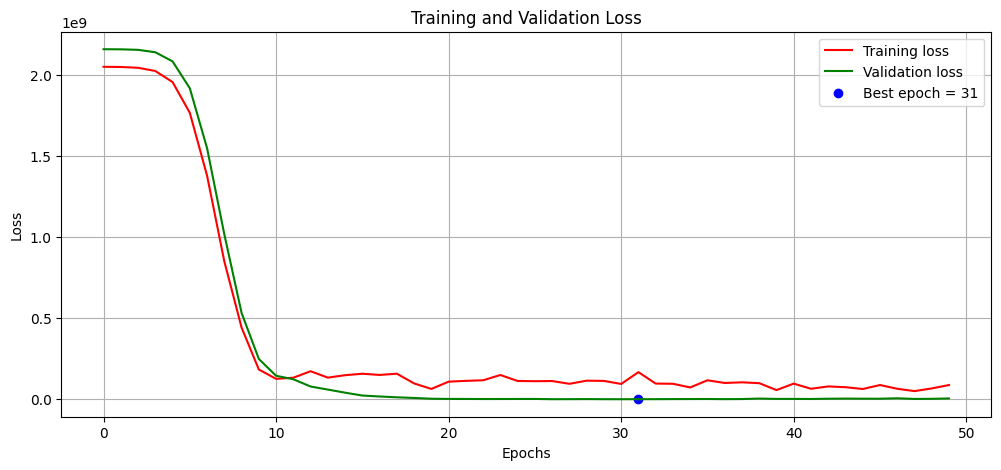

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], 'r', label="Training loss")
plt.plot(history.history['val_loss'], 'g', label="Validation loss")

# Mark the best epoch (minimum validation loss)
best_epoch = np.argmin(history.history['val_loss']) + 1
plt.scatter(best_epoch, history.history['val_loss'][best_epoch-1], color='blue', label=f'Best epoch = {best_epoch}')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()


The Multilayer Perceptron (MLP) model achieved a high accuracy of 97.77% on the test data, indicating strong predictive performance. The low Mean Absolute Percentage Error (MAPE) suggests that the model's predictions are very close to actual car purchase amounts. The model generalizes well

##Logistic regression

This dataset contains 1,000 records with 14 columns, tracking the performance of various digital advertising campaigns. It includes details about budget, duration, platform, target demographics, engagement metrics, and success indicators.
Column Descriptions:
1.	Campaign_ID – Unique identifier for each ad campaign.
2.	Budget – Total budget allocated for the campaign (in USD).
3.	Duration – Number of days the campaign was active.
4.	Platform – The advertising platform (e.g., Facebook, Google, Instagram).
5.	Content_Type – Type of ad content (e.g., Video, Image, Story, Text).
6.	Target_Age – Age group targeted (e.g., 18-24, 25-34).
7.	Target_Gender – Gender targeted (e.g., Male, Female, All).
8.	Region – Geographic location of the audience (e.g., US, UK).
9.	Clicks – Total number of clicks on the ad.
10.	Conversions – Number of successful conversions (e.g., purchases, sign-ups).
11.	CTR (Click-Through Rate) – Percentage of users who clicked the ad relative to impressions.
12.	CPC (Cost Per Click) – Average cost per ad click (in USD).
13.	Conversion_Rate – Percentage of users who converted after clicking the ad.
14.	Success – Binary indicator (1 = successful campaign, 0 = unsuccessful).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/content/ad_campaign_performance.csv") # Update path if needed

# Display first few rows
display(df.head())



,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1



Missing values:
 Campaign_ID        0
Budget             0
Duration           0
Platform           0
Content_Type       0
Target_Age         0
Target_Gender      0
Region             0
Clicks             0
Conversions        0
CTR                0
CPC                0
Conversion_Rate    0
Success            0
dtype: int64
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7569 - loss: 0.5428 - val_accuracy: 0.9136 - val_loss: 0.1872
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9526 - loss: 0.1360 - val_accuracy: 0.9554 - val_loss: 0.1071
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9713 - loss: 0.0792 - val_accuracy: 0.9833 - val_loss: 0.0564
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9871 - loss: 0.0540 - val_accuracy: 0.9861 - val_loss: 0.0401
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9894 - loss: 0.0316 - val_accuracy: 0.9889 - val_loss: 0.0419
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.0282 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0150 - val_accuracy: 0.9916 - val_loss: 0.0308
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9916 - val_loss: 0.0272
Epo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,021 (148.52 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,348 (99.02 KB)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


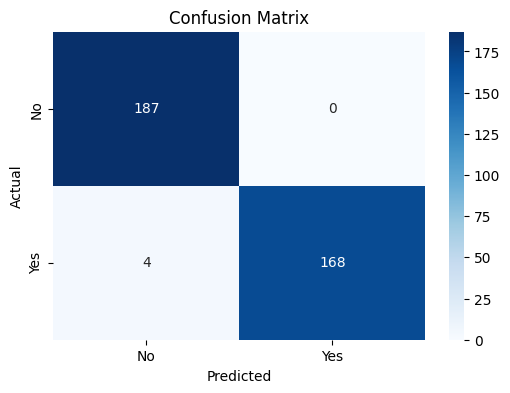


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       187
           1       1.00      0.98      0.99       172

    accuracy                           0.99       359
   macro avg       0.99      0.99      0.99       359
weighted avg       0.99      0.99      0.99       359



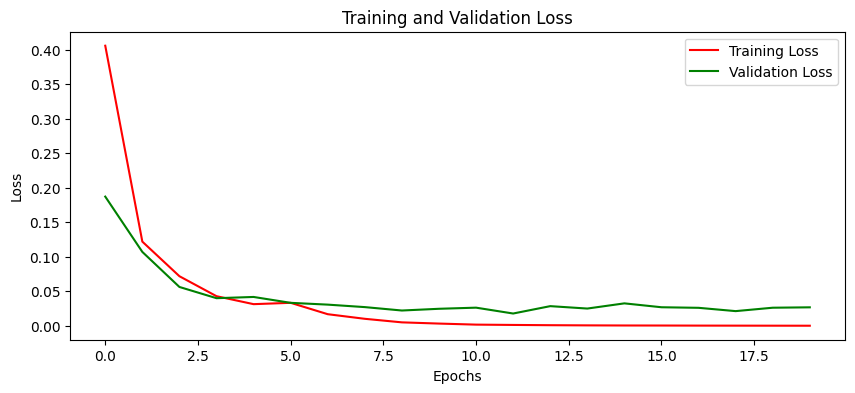

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras



# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Encode categorical columns if any
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for future reference

# Define features and target variable
X = df.drop(columns=["Success"])  # Adjust target column name if different
y = df["Success"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build MLP Model
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Model Summary
model.summary()

# Predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Epoch vs Loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


The logistic MLP model demonstrates rapid convergence, achieving high accuracy within the first few epochs. The validation accuracy stabilizes around 99%, indicating strong generalization. However, the decreasing validation loss followed by slight fluctuations suggests minor overfitting. The model’s performance is strong, but regularization techniques like dropout or early stopping could further improve generalization.

##CNN Model

This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes

1)Leaf smut
2)Brown spot
3)Bacterial leaf blight


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vbookshelf/rice-leaf-diseases")

print("Path to dataset files:", path)

100%|██████████| 36.7M/36.7M [00:00<00:00, 128MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vbookshelf/rice-leaf-diseases/versions/1


Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Classes: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


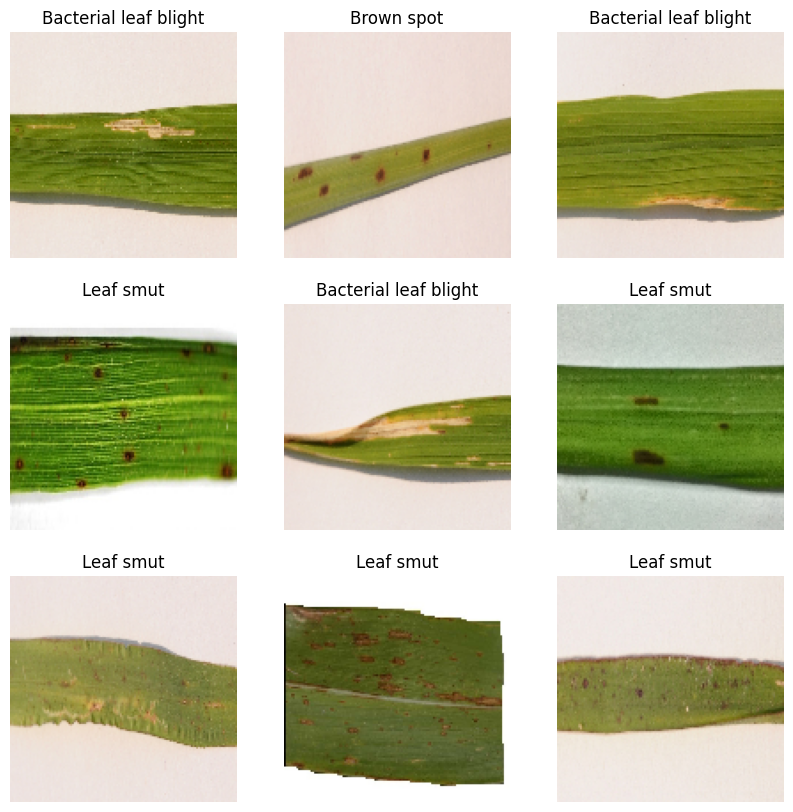

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 954ms/step - accuracy: 0.3545 - loss: 1.2137 - val_accuracy: 0.3333 - val_loss: 1.0039
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 773ms/step - accuracy: 0.4759 - loss: 1.0306 - val_accuracy: 0.6667 - val_loss: 0.8483
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 789ms/step - accuracy: 0.6164 - loss: 0.8535 - val_accuracy: 0.6667 - val_loss: 0.8160
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5546 - loss: 0.7863 - val_accuracy: 0.6667 - val_loss: 0.7856
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 768ms/step - accuracy: 0.7376 - loss: 0.6344 - val_accuracy: 0.7083 - val_loss: 0.7419
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1000ms/step - accuracy: 0.7967 - loss: 0.5575 - val_accuracy: 0.7083 - val_loss: 1.1463
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 919ms/step - accuracy: 0.7984 - loss: 0.5172 - val_accuracy: 0.8750 - val_loss: 0.4855
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 786ms/step - accuracy: 0.8115 - loss: 0.3882 - val_accuracy: 0.7917 - val_loss:

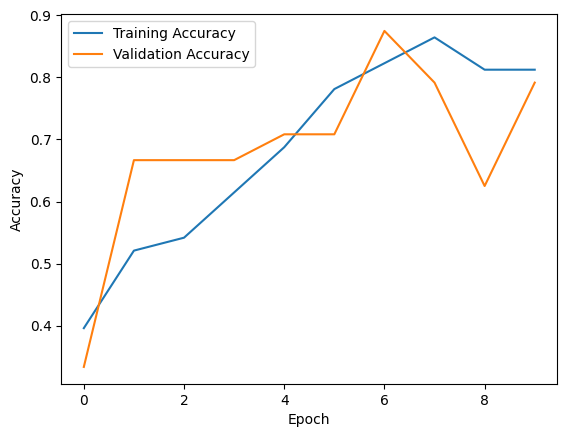

2/2 - 1s - 258ms/step - accuracy: 0.7917 - loss: 0.6058
Test Accuracy: 0.7916666865348816


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Dataset directory (Adjust path if needed)
dataset_path = "/root/.cache/kagglehub/datasets/vbookshelf/rice-leaf-diseases/versions/1/rice_leaf_diseases"

# Image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 16

# Create ImageDataGenerator with train-validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data (80%)
train_generator = datagen.flow_from_directory(dataset_path,
                                              target_size=IMG_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode='sparse',
                                              subset='training')

# Load validation data (20%)
val_generator = datagen.flow_from_directory(dataset_path,
                                            target_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='sparse',
                                            subset='validation')

# Get class labels
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

# Display sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = next(train_generator)  # ✅ Fix: Use next(train_generator)
    plt.subplot(3, 3, i+1)
    plt.imshow(img[0])
    plt.axis('off')
    plt.title(class_names[int(label[0])])
plt.show()


# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # 3 Classes
])

# Model Summary
model.summary()

# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train Model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate Model
test_loss, test_acc = model.evaluate(val_generator, verbose=2)
print("Test Accuracy:", test_acc)



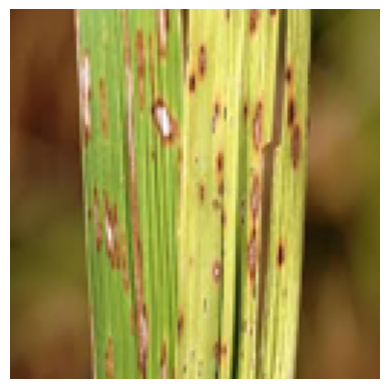

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicted Class: Brown spot


In [10]:
# Load & Predict on New Image
new_image_path = "/content/rice.jpg"
new_image = Image.open(new_image_path)
new_image = new_image.resize((128, 128))
new_image_array = np.array(new_image) / 255.0
new_image_array = np.expand_dims(new_image_array, axis=0)

# Display Image
plt.imshow(new_image)
plt.axis('off')
plt.show()

# Predict Class
predictions = model.predict(new_image_array)
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print("Predicted Class:", predicted_class)


The CNN model was successfully trained for classifying rice leaf diseases with an accuracy of 79.17% on the test set. While the model shows good learning with increasing accuracy over epochs, fluctuations in validation loss suggest potential overfitting. Fine-tuning hyperparameters and augmenting data could further improve performance.

##CNN Model for Video

The dataset with videos depicting people exhibiting aggressive and non-aggressive behavior is intended for classification purposes. It consists of a collection of video files that capture various individuals engaging in different activities and displaying distinct behavioral patterns and CSV-file with classification.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("trainingdatapro/aggressive-behavior-video-classification")

print("Path to dataset files:", path)

100%|██████████| 58.3M/58.3M [00:03<00:00, 16.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1


In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout


In [3]:
import os

VIDEO_DIR = "/root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1"

# Check if the directory exists
if os.path.exists(VIDEO_DIR):
    print("Dataset directory exists!")
    print("Contents:", os.listdir(VIDEO_DIR))
else:
    print("Dataset directory does NOT exist!")


Dataset directory exists!
Contents: ['files', 'aggressive_behavior.csv']


In [4]:
VIDEO_DIR = "/root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files"


In [5]:
import os

print("Available subdirectories:", os.listdir(VIDEO_DIR))


Available subdirectories: ['non_aggressive', 'aggressive']


In [6]:
for label in ["aggressive", "non_aggressive"]:
    label_path = os.path.join(VIDEO_DIR, label)  # Corrected path
    for video in os.listdir(label_path):
        video_path = os.path.join(label_path, video)
        print("Processing:", video_path)
        # video_data = load_video(video_path)  # Uncomment when load_video is defined


Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/aggressive/1.mp4
Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/aggressive/0.mp4
Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/aggressive/3.mp4
Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/aggressive/4.mp4
Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/aggressive/2.mp4
Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/non_aggressive/1.mp4
Processing: /root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files/non_aggressive/0.mp4
Processing: /root/.cache/kagglehub/datasets/tra

In [7]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, LSTM, TimeDistributed, Dropout

# Set parameters
IMG_SIZE = 64      # Resize video frames
FRAME_COUNT = 20   # Number of frames per video
CLASSES = ["Non-Aggressive", "Aggressive"]
EPOCHS = 10
BATCH_SIZE = 8

# Define the function to load video frames
def load_video(video_path, frame_count=FRAME_COUNT):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in np.linspace(0, total_frames-1, frame_count):
        cap.set(cv2.CAP_PROP_POS_FRAMES, int(i))
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))  # Resize frame
        frames.append(frame)

    cap.release()

    frames = np.array(frames) / 255.0  # Normalize
    if len(frames) < frame_count:
        frames = np.pad(frames, ((0, frame_count - len(frames)), (0, 0), (0, 0), (0, 0)), mode='constant')

    return frames

# Load dataset paths
VIDEO_DIR = "/root/.cache/kagglehub/datasets/trainingdatapro/aggressive-behavior-video-classification/versions/1/files"

videos = []
labels = []

for label in ["aggressive", "non_aggressive"]:
    label_path = os.path.join(VIDEO_DIR, label)
    for video in os.listdir(label_path):
        video_path = os.path.join(label_path, video)
        video_frames = load_video(video_path)
        videos.append(video_frames)
        labels.append(1 if label == "aggressive" else 0)  # 1 = Aggressive, 0 = Non-Aggressive






In [8]:
# Convert to NumPy arrays and reshape
X = np.array(videos)  # Shape: (num_videos, FRAME_COUNT, IMG_SIZE, IMG_SIZE, 3)
y = tf.keras.utils.to_categorical(labels, num_classes=2)  # One-hot encode labels

# Check the shape
print("Dataset Shape:", X.shape)  # Should be (num_videos, FRAME_COUNT, IMG_SIZE, IMG_SIZE, 3)

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset Shape: (11, 20, 64, 64, 3)


In [9]:
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense, LSTM, TimeDistributed, Dropout

# Define Model
model = Sequential([
    Input(shape=(FRAME_COUNT, IMG_SIZE, IMG_SIZE, 3)),  # Correct Input Shape
    Conv3D(32, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Conv3D(64, kernel_size=(3, 3, 3), activation='relu'),
    MaxPooling3D(pool_size=(2, 2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Aggressive, Non-Aggressive
])

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5000 - loss: 0.7035 - val_accuracy: 0.6667 - val_loss: 1.1593
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - accuracy: 0.5000 - loss: 2.8831 - val_accuracy: 0.3333 - val_loss: 0.8081
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7500 - loss: 0.5823 - val_accuracy: 0.3333 - val_loss: 0.7777
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8750 - loss: 0.5058 - val_accuracy: 0.6667 - val_loss: 0.5890
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.2500 - loss: 0.7501 - val_accuracy: 0.6667 - val_loss: 0.5595
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6250 - loss: 0.4987 - val_accuracy: 0.6667 - val_loss: 0.5633
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8750 - loss: 0.4169 - val_accuracy: 0.6667 - val_loss: 0.5637
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8750 - loss: 0.3498 - val_accuracy: 0.6667 - val_loss: 0.557

In [10]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the trained model
model.save("video_classification_model.h5")

# Load and test the model
model = tf.keras.models.load_model("video_classification_model.h5")

# Make predictions on a test video
test_video = X_test[0].reshape(1, FRAME_COUNT, IMG_SIZE, IMG_SIZE, 3)  # Reshape for model input
prediction = model.predict(test_video)
predicted_label = CLASSES[np.argmax(prediction)]
print("Predicted class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6667 - loss: 0.7520


Test Accuracy: 66.67%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
Predicted class: Aggressive
